## Table of Contents
1.  [Introduction](#introduction)
2.  [Dataset](#dataset)
     1. [Attribute Analysis](#attribute-analysis)
3.  [Logistic Regression](#logistic-regression)
     1. [Cost Function](#cost-function)
     2. [Gradient Descent](#gradient-descent)
4.  [Cross Validation Procedure](#cross-validation-procedure)
5.  [Implementation](#implementation)
     1. [Normalization](#normalization)
     2. [Data set splitting](#data set splitting)
     3. [Cost Function Implementation](#cost-function-implementation)
     4. [Gradient Descent Implementation](#cost-function-implementation)
6.  [Experiments](#experiments)
    1. [Performance measures](#performance measures)
    2. [Comparison](#benchmarks)
          1. [Standard libraries](#standard libraries)
          2. [Numpy version](#comparison-with-numpy)
     
7.  [Conclusions](#conclusions)

## Introduction

 

More information at:
- [Machine Learning Coursera - Andre Ng](https://www.coursera.org/learn/machine-learning/)
- [Lecture Notes pg(16-19)](http://cs229.stanford.edu/notes/cs229-notes1.pdf)

## Dataset

Spambase dataset contains 4601 instances of different emails classified into spam or legit email according 57 continious values plus the nominal class which is the label. 

The dataset was produced by Hewlett-Packard Labs in Juky 1999.

The dataset is uploaded in [this repository](ftp://ftp.ics.uci.edu/pub/machine-learning-databases/spambase/).

### Attribute analysis

All attributes are continuous which make suitable to use regression, in our case, logistic regression as we want to detect if there is spam(dependent variable) depending of a set of attributes(predictors or independent variables).

The attribute statistics are summarized in this tabble:

| Column |Min: |Max: |Average: |Std.Dev: |Coeff.Var_%: |
|--|--|-----|--------|--------|----|
|1 |0 |4.54 |0.10455 |0.30536 |292 |
|2 |0 |14.28 |0.21301 |1.2906 |606 |
|3 |0 |5.1 |0.28066 |0.50414 |180 |
|4 |0 |42.81 |0.065425 |1.3952 |2130 |
|5 |0 |10 |0.31222 |0.67251 |215 |
|6 |0 |5.88 |0.095901 |0.27382 |286 |
|7 |0 |7.27 |0.11421 |0.39144 |343 |
|8 |0 |11.11 |0.10529 |0.40107 |381 |
|9 |0 |5.26 |0.090067 |0.27862 |309 |
|10 |0 |18.18 |0.23941 |0.64476 |269 |
|11 |0 |2.61 |0.059824 |0.20154 |337 |
|12 |0 |9.67 |0.5417 |0.8617 |159 |
|13 |0 |5.55 |0.09393 |0.30104 |320 |
|14 |0 |10 |0.058626 |0.33518 |572 |
|15 |0 |4.41 |0.049205 |0.25884 |526 |
|16 |0 |20 |0.24885 |0.82579 |332 |
|17 |0 |7.14 |0.14259 |0.44406 |311 |
|18 |0 |9.09 |0.18474 |0.53112 |287 |
|19 |0 |18.75 |1.6621 |1.7755 |107 |
|20 |0 |18.18 |0.085577 |0.50977 |596 |
|21 |0 |11.11 |0.80976 |1.2008 |148 |
|22 |0 |17.1 |0.1212 |1.0258 |846 |
|23 |0 |5.45 |0.10165 |0.35029 |345 |
|24 |0 |12.5 |0.094269 |0.44264 |470 |
|25 |0 |20.83 |0.5495 |1.6713 |304 |
|26 |0 |16.66 |0.26538 |0.88696 |334 |
|27 |0 |33.33 |0.7673 |3.3673 |439 |
|28 |0 |9.09 |0.12484 |0.53858 |431 |
|29 |0 |14.28 |0.098915 |0.59333 |600 |
|30 |0 |5.88 |0.10285 |0.45668 |444 |
|31 |0 |12.5 |0.064753 |0.40339 |623 |
|32 |0 |4.76 |0.047048 |0.32856 |698 |
|33 |0 |18.18 |0.097229 |0.55591 |572 |
|34 |0 |4.76 |0.047835 |0.32945 |689 |
|35 |0 |20 |0.10541 |0.53226 |505 |
|36 |0 |7.69 |0.097477 |0.40262 |413 |
|37 |0 |6.89 |0.13695 |0.42345 |309 |
|38 |0 |8.33 |0.013201 |0.22065 |1670 |
|39 |0 |11.11 |0.078629 |0.43467 |553 |
|40 |0 |4.76 |0.064834 |0.34992 |540 |
|41 |0 |7.14 |0.043667 |0.3612 |827 |
|42 |0 |14.28 |0.13234 |0.76682 |579 |
|43 |0 |3.57 |0.046099 |0.22381 |486 |
|44 |0 |20 |0.079196 |0.62198 |785 |
|45 |0 |21.42 |0.30122 |1.0117 |336 |
|46 |0 |22.05 |0.17982 |0.91112 |507 |
|47 |0 |2.17 |0.0054445 |0.076274 |1400 |
|48 |0 |10 |0.031869 |0.28573 |897 |
|49 |0 |4.385 |0.038575 |0.24347 |631 |
|50 |0 |9.752 |0.13903 |0.27036 |194 |
|51 |0 |4.081 |0.016976 |0.10939 |644 |
|52 |0 |32.478 |0.26907 |0.81567 |303 |
|53 |0 |6.003 |0.075811 |0.24588 |324 |
|54 |0 |19.829 |0.044238 |0.42934 |971 |
|55 |1 |1102.5 |5.1915 |31.729 |611 |
|56 |1 |9989 |52.173 |194.89 |374 |
|57 |1 |15841 |283.29 |606.35 |214 |
|58 |0 |1 |0.39404 |0.4887 |124 |



## Logistic Regression

Logistic Regression(LR) is an algorithm used in supervised problems where the data is labeled previously and it is needed a binary or dichotomous classifier.

The LR algorithm it is based on linear regression and the logistic function...

### Cost function

The cost function applied in logistic regression 


$Cost(h_{\theta}(x),y)=\left\{
                \begin{array}{ll}
                  -log({h_{\theta}(x)})    & \quad \text{if } x \text{ is 1}\\
                  -log({1-h_{\theta}(x)})  & \quad \text{if } n \text{ is 0}
                \end{array}
              \right.$
              
Intuitively: the cost funtions returns 0 if the hypothesis function output is equal to the true label. In case the model states a diferent output the cost funtion will approach infinity.
              
If we reduce the formula in a more compact way we get: 
$Cost(h_{\theta}(x),y) = -y·log(h_{\theta}(x)) - (1-y)log(1-h_{\theta}(x))$


Info obtained from [lecture of Andrew NG](https://www.coursera.org/learn/machine-learning/lecture/1XG8G/cost-function)

## Cross Validation Procedure


To ensure we correctly train, validate and test our model, we will divide our dataset in three main components with such proportions:

- __Training set (~ 60%)__: this data will be used to train a given model
- __Validation set (~ 20%)__: this data will be used to evaluate a given trained model
- __Test set (~ 20%)__: this data will be used to evaluate the ultimately chosen model.

Also, to reduce the chances of overfitting, we will use cross-validation. To respect these splitting ratios, we will use a __4-fold cross-validation__ so that 20% of the original dataset (25% of the non-testing set) is always devoted to validation.


## Implementation




### Cluster configuration and RDD creation 

In [1]:
file_object  = open('spam.data', 'r')
lines = file_object.readlines()
file_object.close()
    
total_size = len(lines)

import math, time
import numpy as np
from random import shuffle
from pyspark import SparkContext, SparkConf, rdd
conf = SparkConf().setAppName("Spam Filter").setMaster("local[1]").set("spark.hadoop.validateOutputSpecs", "false");
sc = SparkContext(conf=conf)

In [2]:
# Creating RDD
master_rdd = sc.parallelize(lines)
master_rdd = master_rdd.map(lambda x: [float(item) for item in x.split('\n')[0].split(" ")])
master_rdd = master_rdd.cache()

In [3]:
#temporal_list = master_rdd.collect()
#shuffle(temporal_list) # Labels are all together 1's and 0's
#master_rdd = sc.parallelize(temporal_list)

# Get stats of the instance values
max_min_rdd = master_rdd.flatMap(lambda x: [ (index_key, x[index_key]) for index_key in range(len(x))])
max_list = [ item[1] for item in max_min_rdd.reduceByKey(lambda x,y: x if x > y else y).collect()]
min_list = [ item[1] for item in max_min_rdd.reduceByKey(lambda x,y: x if x < y else y).collect()]
mean_list = [ value[1]/len(lines) for value in max_min_rdd.reduceByKey(lambda x,y: x + y).collect()]
std_deviation_list = [ math.sqrt((value[1]/len(lines))) for value in max_min_rdd.map(lambda x:  [ x[0],(x[1] - mean_list[x[0]])*(x[1] - mean_list[x[0]]) ]).reduceByKey(lambda x,y: x+y).collect() ]
coeff_variation = [ std_deviation_list[index]/mean_list[index] for index in range(len(std_deviation_list))]

# Normalize values
def normalize_data(data):
    max_min = data.flatMap(lambda x: [ (index_key, x[index_key]) for index_key in range(len(x)-1)]) #Last position is label
    max__list = sorted(max_min.reduceByKey(lambda x,y: x if x > y else y).collect())
    min__list = sorted(max_min.reduceByKey(lambda x,y: x if x < y else y).collect())
    mean_list = sorted([ value[1]/data.count() for value in max_min.reduceByKey(lambda x,y: x + y).collect()])
    
    return data.map(lambda x: [(float(x[index]) - min__list[index][1])/(max__list[index][1] - min__list[index][1]) if index != len(x)-1 else x[index] for index in range(len(x))] )
    

    
master_norm_rdd = normalize_data(master_rdd).cache()
#.map(lambda x: [(x[index] - min_list[index])/(max_list[index] - min_list[index]) for index in range(len(x)-1)] )
max_min_norm_rdd = master_norm_rdd.flatMap(lambda x: [ (index_key, x[index_key]) for index_key in range(len(x))])

print("--")
print("Calculated stats of the features of all instances: max, min, mean, std_deviation, and coeff_variation")
print("Values have been normalized and are kept in the \'master_norm_rdd\' variable")
print("--")

--
Calculated stats of the features of all instances: max, min, mean, std_deviation, and coeff_variation
Values have been normalized and are kept in the 'master_norm_rdd' variable
--


### Split of data in different datasets

In [5]:
non_test_rdd, test_rdd = master_norm_rdd.randomSplit([0.8, 0.2])
non_test_rdd = non_test_rdd.cache()
test_rdd = test_rdd.cache()

# save test set in a file
test_rdd.saveAsTextFile('spam.test.set')

print("Train & Validation: ", non_test_rdd.count(), " samples")
print("Test: ", test_rdd.count(), " samples")
print("> Do sizes match? ", non_test_rdd.count() + test_rdd.count() == total_size)

Train & Validation:  3696  samples
Test:  905  samples
> Do sizes match?  True


In [6]:
def get_train_validation_rdds(sub_rdds, k):
    
    indices = list(range(0, 4))
    
    # the validation set is the k-th sub-rdd
    validation_rdd = sub_rdds[indices.pop(k)]
    
    # initialize the train rdd with the first sub-rdd left
    train_rdd = sub_rdds[indices.pop(0)]
    # append all the remaining sub-rdds to the train-rdd
    for i in indices:
        train_rdd = train_rdd.union(sub_rdds[i])
    
    # save train and validation set in a file
    validation_rdd.saveAsTextFile('spam.validation' + str(k+1) + '.norm.data')
    train_rdd.saveAsTextFile('spam.train' + str(k+1) + '.data')
    
    validation_rdd = validation_rdd.cache()
    train_rdd = train_rdd.cache()
    
    return train_rdd, validation_rdd

In [10]:
import time

sub_rdds = non_test_rdd.randomSplit([0.25, 0.25, 0.25, 0.25])
for rdd in sub_rdds:
    rdd = rdd.cache()

# k-fold iterations
for k in range(0, 4):
    
    train_rdd, validation_rdd = get_train_validation_rdds(sub_rdds, k)

In [18]:
import math
validating_size = round(total_size*0.2)

# Creating RDDs
master_norm_list = master_norm_rdd.collect()

# Save a portion of the RDD as validating set and use the rest for training and testing purposes
validatingset_rdd = master_norm_rdd.sample
train_and_test_rdd = sc.parallelize(master_norm_list[validating_size:])

trainingset_rdd.saveAsTextFile('spam.training.norm.data')
validatingset_rdd.saveAsTextFile('spam.validating.norm.data')
testingset_rdd.saveAsTextFile('spam.testing.norm.data')

print("File \'spam.data\' has been normalized and splitted in 3 files: ", 
      "\n \'spam.training.norm.data\', \'spam.validating.norm.data\', \'spam.testing.norm.data\'")
print("Sizes: ",
      "\n - Training data: ", trainingset_rdd.count() , " samples",
      "\n - Validating data: ",validatingset_rdd.count(), " s.",
      "\n - Testing data: ",testingset_rdd.count(), " s.",
      "\n -- Total size:", total_size, " s.")

File 'spam.data' has been normalized and splitted in 3 files:  
 'spam.training.norm.data', 'spam.validating.norm.data', 'spam.testing.norm.data'
Sizes:  
 - Training data:  2761  samples 
 - Validating data:  920  s. 
 - Testing data:  920  s. 
 -- Total size: 4601  s.


### Cost function

From the [previous chapter](#), the cost function was defined as:

$Cost(h_{\theta}(x),y) = -y·log(h_{\theta}(x)) - (1-y)log(1-h_{\theta}(x))$

where $h_{\theta}(x)$ is the predicted label and $y$ the true label.


In [176]:
def training_logistic_regression_model(training_set, l_rate, iterations=1000, lambda_reg = 0):
    # Init the coeff
    n_features = len(training_set[0])
    
    weights = [0.0 for index in range(n_features)]
    l_rate_over_m = l_rate/len(training_set)
    
    # See http://holehouse.org/mlclass/07_Regularization.html for details
    for iteration in range(iterations):
        sum_error = 0
        weights_upd = [ [] for index in range(n_features)]
        
        for instance in training_set:
            y = instance[-1]   # the last element of each row is the true label
            yhat = predict(weights, instance)  # compute the predicted label according to current weights
            
            error = yhat - y
            sum_error += error**2
            
            for i in range(len(instance)): # Adding items of sumatorium 
                if (i < len(instance) -1):
                    weights_upd[i].append((error * instance[i]))
                else:
                    weights_upd[-1].append(error) # Calculating the bias \theta_0 
        
        # Regularization
        for i in range(n_features):  
            weights[i] = weights[i] * (1 - l_rate_over_m * lambda_reg) - (l_rate_over_m * sum(weights_upd[i]))
        
    return ( sum_error, weights )

## SPARK IMPLEMENTATIONS ###############################################################################################
# coeff and values must be lists with the same length
def predict(coeff, values):
    
    logit = sum([ coeff[index] * values[index] for index in range(len(coeff) -1) ]) + coeff[-1]
    
    if logit < 0: # when logit becomes a large positive value, math.exp(gamma) overflows
        sigmoid = 1 - 1 / (1 + math.exp(logit))
    else:
        sigmoid = 1 / (1 + math.exp(-logit))
    return sigmoid

# https://www.coursera.org/learn/machine-learning/lecture/10sqI/map-reduce-and-data-parallelism
import time
def training_logistic_regression_model_spark(train_rdd, l_rate, iterations=1000, lambda_reg = 0):
    
    # compute useful constants for further computations
    l_rate_over_size = l_rate / train_rdd.count()
    n_features = len(train_rdd.first())

    # initialize the weights vector (one weight per feature)
    n_weights = n_features
    weights = np.zeros(n_features)
    
    for iteration in range(iterations):
        
        if (iteration % 10 == 0):
            start_it = time.time()
        
        # the key of the <key, value> pairs is the index of the feature, 
        #  so that we can reduce by it and sum all the updates
        weights = train_rdd \
        .flatMap(lambda instance: [(f, (weights[f], get_weight_upd(f, weights, instance))) for f in range(n_features)])\
        .reduceByKey(lambda x, y: (x[0], x[1] + y[1]))\
        .map(lambda key_weight_weightupd: update_weight(weight_weightupd=key_weight_weightupd[1],
                                                        l_rate_over_size=l_rate_over_size, 
                                                        lambda_reg=0))\
        .collect()
        
        if (iteration % 10 == 0):
            start_cf = time.time()
            
        cost =  cost_function_spark(weights, train_rdd, lambda_reg)
        
        if (iteration % 10 == 0):
            print("> Cost function running time: ", time.time() - start_cf, "s")
        
        if(iteration % 10 == 0):
            print('> iteration=',iteration,' lrate=',l_rate, ' cost_func=', cost)
            print("> Iteration running time: ", time.time() - start_it, "s")
            
    return cost, weights

def get_weight_upd(i_feature, weights, instance):
    n_features = len(instance)
    if (i_feature < n_features -1):
        return (predict(weights, instance) - instance[-1]) * instance[i_feature]
    else:
        return (predict(weights, instance) - instance[-1])
    
    
def cost_function_spark(weights, data_rdd, lambda_reg=0):
    #if(not isinstance(dataset, rdd.PipelineRDD)):
    #    dataset = sc.parallelize(dataset)

    size = data_rdd.count()
        
    summation = data_rdd \
    .map(lambda instance: get_cost_upd(weights, instance)) \
    .reduce(lambda cost_upd1, cost_upd2: cost_upd1 + cost_upd2)
    
    reg_term = lambda_reg/size * sum([ weights[index]**2 for index in range(len(weights)-1) ]) 
    cost = -summation/size + reg_term
    return cost

def get_cost_upd(weights, instance):
    y = instance[-1]                    # true label
    yhat = predict(weights, instance)   # predicted label
    
    return y * math.log(yhat) + (1 - y) * math.log(1 - yhat)
    

def optimal_learning_rate_value_spark(training_set_rdd, initial_l_rate = 0.05, max_iterations = 20000, lambda_reg = 0):
    order_log_list = [initial_l_rate]
    [ order_log_list.append(order_log_list[-1]*(2)) for index in range(10)]
    error_coeff_list = []
    for l_rate in order_log_list:
        error_coeff_list.append(
            training_logistic_regression_model_spark(training_set_rdd, l_rate, max_iterations, lambda_reg))
    return sorted(error_coeff_list)  
    

In [173]:
def update_weight(weight_weightupd, l_rate_over_size, lambda_reg):
    weight, weight_upd = weight_weightupd
    return (weight * (1 - l_rate_over_size * lambda_reg)) - (l_rate_over_size * weight_upd)

In [162]:
import time
start = time.time()
l_rate = 2
l_rate_over_size = l_rate / train_rdd.count()
n_features = len(train_rdd.first())
weights1 = np.zeros(n_features)

weights1 = train_rdd\
.flatMap(lambda instance: [(i_feature, (weights1[i_feature], get_weight_upd(i_feature, weights1, instance))) 
                           for i_feature in range(n_features)])\
.reduceByKey(lambda x, y: (x[0], x[1] + y[1]))\
.map(lambda key_weight_weightupd: update_weight(weight_weightupd=key_weight_weightupd[1],
                                                l_rate_over_size=l_rate_over_size, 
                                                lambda_reg=0))

print(weights1.collect())
print(">> ", time.time() - start, "s")

[0.0031901167258571073, 0.00082167436106014781, 0.014432547883848405, 0.0026106882044988427, 0.0031657644722971343, 0.0084599784637473044, 0.0071295525245273867, 0.0049993073135099035, -0.024840270207770219, -0.011647108716614663, -0.0045550610193826275, -0.0085820760464990035, -0.014687265896140458, -0.006751192939487353, -0.010706795280926438, -0.0069295294092750776, -0.0034667555074607442, 0.0041709718615863924, 0.0023122326501843261, -0.19956927494615936, -0.0048851198770965736, 0.0094256999282125026, 0.0057148930973499358, 0.01386929172408293, 0.0014479540559942578, 0.013431000540919875, 0.0047635237321291346, 0.018776055902052856, -0.015091320088695927, -0.0060081821673392943, -0.0086906621945260533, -0.0044061378320172278, -0.0014340265898175493, -0.0057626065501577509, -0.0037193108399138537, -0.0022330215924917544, -0.0054125146416484152, 0.010852673687085628, 0.0030591627397241247, 0.0088917979252002236, 0.0076866353145709091, 0.009425181311227512, -0.0092818947745077988, 0.0

In [161]:
import time
start = time.time()
l_rate = 2
l_rate_over_size = l_rate / train_rdd.count()
n_features = len(train_rdd.first())
weights2 = np.zeros(n_features)

weights2_upd = []

# the key of the <key, value> pairs is the index of the feature, 
#  so that we can reduce by it and sum all the updates
weights2_upd = train_rdd \
.flatMap(lambda instance : [(i_feature, get_weight_upd(i_feature, weights2, instance))
                            for i_feature in range(n_features)])\
.reduceByKey(lambda x,y: x+y)\
.map(lambda key_value_tuple: key_value_tuple[1])\
.collect()
#print(weights2_upd.collect())

weights2 = [ ( weights2[i] * (1 - l_rate_over_size * 0) ) - ( l_rate_over_size * weights2_upd[i] )
            for i in range(n_features)]

print(weights2)
print(">> ", time.time() - start, "s")
#print("N° of elements:   ", weights2_upd.count())
#print("First element:    ", weights2_upd.first())
#print("Last 10 elements: ", weights2_upd.top(10))
#print(weights2[0])
#print(weights2[47:])

[0.0031901167258571073, 0.00082167436106014781, 0.014432547883848405, 0.0026106882044988427, 0.0031657644722971343, 0.0084599784637473044, 0.0071295525245273867, 0.0049993073135099035, -0.024840270207770219, -0.011647108716614663, -0.0045550610193826275, -0.0085820760464990035, -0.014687265896140458, -0.006751192939487353, -0.010706795280926438, -0.0069295294092750776, -0.0034667555074607442, 0.0041709718615863924, 0.0023122326501843261, -0.19956927494615936, -0.0048851198770965736, 0.0094256999282125026, 0.0057148930973499358, 0.01386929172408293, 0.0014479540559942578, 0.013431000540919875, 0.0047635237321291346, 0.018776055902052856, -0.015091320088695927, -0.0060081821673392943, -0.0086906621945260533, -0.0044061378320172278, -0.0014340265898175493, -0.0057626065501577509, -0.0037193108399138537, -0.0022330215924917544, -0.0054125146416484152, 0.010852673687085628, 0.0030591627397241247, 0.0088917979252002236, 0.0076866353145709091, 0.009425181311227512, -0.0092818947745077988, 0.0

In [138]:
x = (3, 2, 1)
x[1]

2

In [175]:
# CHECK IF SPARK CODE WORKS
import time
start = time.time()
x = training_logistic_regression_model_spark(train_rdd, iterations=400, l_rate=2, lambda_reg=0.0)
end = time.time()

print("Error: ", error)
print("Coefficients: ", coeff)
print()
elapsed_time = end - start
unit = "secs"
if (elapsed_time % 60 >= 1):
    elapsed_time /= 60
    unit = "mins"
print(">> Elapsed time: ", round(elapsed_time, 2), unit)

> Cost function running time:  0.19094610214233398 s
> iteration= 0  lrate= 2  cost_func= 0.6944994357984838
> Iteration running time:  2.352281332015991 s
> Cost function running time:  0.14788818359375 s
> iteration= 10  lrate= 2  cost_func= 0.6932611389669587
> Iteration running time:  2.152902364730835 s
> Cost function running time:  0.16089391708374023 s
> iteration= 20  lrate= 2  cost_func= 0.690921143921324
> Iteration running time:  2.290107488632202 s
> Cost function running time:  0.17609715461730957 s
> iteration= 30  lrate= 2  cost_func= 0.6983325706744552
> Iteration running time:  2.342585563659668 s
> Cost function running time:  0.24168944358825684 s
> iteration= 40  lrate= 2  cost_func= 0.6974511042633942
> Iteration running time:  2.5515129566192627 s


KeyboardInterrupt: 

In [12]:
# CHECK IF NORMAL CODE (NO SPARK) WORKS
import time
start = time.time()
error_coeff = training_logistic_regression_model(trainingset_rdd.collect(), 10, 400, 0.0)
end = time.time()

print("Error: ", error_coeff[0])
print("Coefficients: ", error_coeff[1])
print()
print(">> Elapsed time: ", round(end - start, 2), "secs")

Error:  222.99143997004023
Coefficients:  [-1.259001687967174, -1.4624220197007904, 1.697955257699117, 1.9239835638996428, 4.886979677615824, 2.7290138841251457, 9.854909761280533, 4.572386202966409, 4.21325960350969, 1.6997636302916048, 1.5733024567694436, -1.177342970394678, 0.8182427156193635, 1.8373391338709493, 3.19830670301719, 7.336386282777127, 5.7376952208512435, 3.976985648250511, 2.1892580308168594, 3.651709991649737, 4.141910947977142, 4.282802137197996, 8.874064630898523, 4.9163017404368246, -7.941188010248594, -4.698008350280225, -6.232176031031324, -2.1608809790823877, -2.047054850747421, -4.279452527031844, -1.1730497660707464, -1.518250035796162, -2.5521827833931727, -1.2385096512713256, -1.3045083318301256, 0.12625292992493437, -1.7820596384138059, -1.1782206888639717, -2.414969912638158, -0.7291739670573102, -2.6576857801003073, -4.828570688639126, -2.834506075321738, -2.0964388783059777, -4.5698445701706, -4.274278800638462, -2.2179503088138515, -1.6787851250991581,

In [114]:
coeff = [0.18450310814753418, -0.1018614574807301, -51.80266262562908]
predict(coeff,a.collect()[0])

0.0

In [139]:
data = trainingset_rdd.collect()
# coeff = [40, 51, -153] optimum
coeff = training_logistic_regression_model(data, 10, 4000, 0.5)[1] # Check if code works
#coeff = [random.uniform(0, 1) for index in range(len(training_set_rdd.first()))]
#coeff = [0.0 for index in range(len(training_set_rdd.first()))]
for index in range(a.count()):
    print(predict(coeff,data[index]), data[index][-1])

0.22585092248056826 0.0
0.7752016855553817 1.0
0.0654371540627735 0.0
0.23733170070721787 0.0
0.03916783792172873 0.0
0.8937775502383307 1.0
0.24262462014478559 1.0
0.005817346885660601 0.0
0.0601846158323579 0.0
0.01960031795080852 0.0
0.2059994377709945 0.0
0.24197988171014795 0.0


In [124]:
coeff = [40, 51, -153]
coeff = error_coeff[1]
#coeff = [random.uniform(0, 1) for index in range(len(training_set_rdd.first()))]
#coeff = [0.0 for index in range(len(training_set_rdd.first()))]
for index in range(a.count()):     
    print(predict(coeff,a.collect()[index]), a.collect()[index][-1])

0.0 0
4.6629367034256575e-15 0
3.88383322929009e-05 0
0.0 0
3.175237850427948e-14 0
1.5401013797600172e-12 0
0.9999999999999998 1
0.9999999999999998 1
1.0 1
1.0 1
1.0 1
1.0 1


In [41]:
import time
start = time.time()
error_coeff = training_logistic_regression_model(a.collect(), 50, 4, 0.1) # Check if code works
end = time.time()
print(end - start)

>iteration= 0  lrate= 5.0  error= 1.6116474406425663 cost= 3.872148020632097
0.21599288750875967 0  -  0.26061790903180104 1
>iteration= 1  lrate= 5.0  error= 1.7504549155878188 cost= 5.7485086700201915
0.8080865512827858 0  -  0.9479629150397929 1
>iteration= 2  lrate= 5.0  error= 3.9483504738736555 cost= -4.730383918255728
0.001116196463132768 0  -  0.0008646378870037497 1
>iteration= 3  lrate= 5.0  error= 4.85213326774374 cost= 5.201040605408044
0.9857967152559239 0  -  0.9998046755047099 1
0.6122069358825684


In [107]:
a = trainingset_rdd.map(lambda x: [x[1],x[2],x[3],x[-1]]).collect()
a = sc.parallelize([
    [0,   0,   0],
    [0.5, 2,   0],
    [1,   1.8, 0],
    [0.5, 1.5, 0],
    [1,   1.5, 0],
    [2,   0.5, 0],
    [0.5, 3,   1],
    [0.5, 3,   1],
    [2,  2,    1],
    [3,  2,    1],
    [3,  1,    1],
    [3,  3,    1]    
])

In [35]:
a.collect()[0][-1]

0

In [148]:
training_set_rdd = trainingset_rdd.flatMap(lambda x: parallel_step_gradient(x, coeff)) 
training_set_rdd = training_set_rdd.reduceByKey(lambda x,y:  x+y )
training_set_rdd.count()
coeff_update=sorted(training_set_rdd.collect())


#training_logistic_regression_model_spark(trainingset_rdd, 0.05, 1000, 0.005)

In [32]:
start = time.time()
#values_spark = optimal_learning_rate_value_spark(trainingset_rdd, max_iterations=100, lambda_reg=0.05)
coeffs = training_logistic_regression_model_spark(trainingset_rdd, 0.5, 200, 0)
end = time.time()
print(end - start)

NameError: name 'x' is not defined

In [59]:
from operator import add 
trainingset_rdd = sc.parallelize([(1,2),(2,3),(4,5),(6,7),(8,9)])
#trainingset_rdd = sc.parallelize([1,2,2,3,4,5,6,7,8,9])
a= 
b = a.reduceByKey(lambda x,y: add(sum(x),sum(y)))
b.collect()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 89.0 failed 1 times, most recent failure: Lost task 0.0 in stage 89.0 (TID 282, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 177, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 172, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/spark/python/pyspark/rdd.py", line 346, in func
    return f(iterator)
  File "/usr/local/spark/python/pyspark/rdd.py", line 1850, in _mergeCombiners
    merger.mergeCombiners(iterator)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 272, in mergeCombiners
    d[k] = comb(d[k], v) if k in d else v
  File "<ipython-input-59-a86513ec794c>", line 5, in <lambda>
TypeError: 'int' object is not iterable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1499)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1487)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1486)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1486)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:814)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:814)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1714)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1669)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1658)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:630)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2022)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2043)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2062)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2087)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:936)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:362)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:935)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:458)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor36.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 177, in main
    process()
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/worker.py", line 172, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/usr/local/spark/python/pyspark/rdd.py", line 346, in func
    return f(iterator)
  File "/usr/local/spark/python/pyspark/rdd.py", line 1850, in _mergeCombiners
    merger.mergeCombiners(iterator)
  File "/usr/local/spark/python/lib/pyspark.zip/pyspark/shuffle.py", line 272, in mergeCombiners
    d[k] = comb(d[k], v) if k in d else v
  File "<ipython-input-59-a86513ec794c>", line 5, in <lambda>
TypeError: 'int' object is not iterable

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:323)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:287)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:108)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:335)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


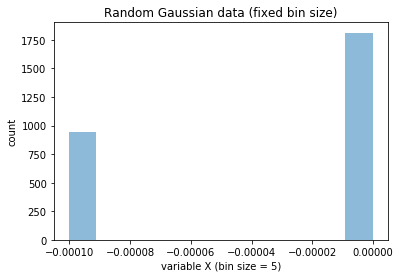

In [208]:
a = np.histogram([1,2,3,4,5,6,7,8,9,2,3,4,5,2,3,4,2,3,4,5,2,6,8])
b = [1,2,3,4,5,6,7,8,9,2,3,4,5,2,3,4,2,3,4,5,2,6,8]
b = trainingset_rdd.map(lambda x: x[-1]).collect()

import numpy as np
import random
from matplotlib import pyplot as plt

data = b

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.hist(data, bins=11, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [ ]:
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.3
n_epoch = 100

training_logistic_regression_model(dataset, l_rate, n_epoch,0)

In [ ]:
def optimal_learning_rate_value(training_set, initial_l_rate = 0.05, max_iterations = 20000, lambda_reg = 0):
    order_log_list = [initial_l_rate]
    [ order_log_list.append(order_log_list[-1]*(2)) for index in range(10)]
    error_coeff_list = []
    for l_rate in order_log_list:
        error_coeff_list.append(training_logistic_regression_model(training_set, l_rate, max_iterations, lambda_reg))
    return sorted(error_coeff_list)         

In [ ]:
values2 = optimal_learning_rate_value(trainingset_rdd.collect(), max_iterations=60, lambda_reg=0.05)

In [ ]:
values = optimal_learning_rate_value(trainingset_rdd.collect(), lambda_reg=0.05)

## Experiments

bla, bla

## Conclusions

bla, bla